In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h1>Feature Engineering and data cleaning<h1>

In [42]:
df1 = df.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis=1 )

In [43]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df1.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [47]:
df1[df1['EstimatedSalary'] < 10000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
23,669,France,Male,46,3,0.00,2,0,1,8487.75,0
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
84,493,France,Female,46,4,0.00,2,1,0,1907.66,0
99,413,France,Male,34,9,0.00,2,0,0,6534.18,0
...,...,...,...,...,...,...,...,...,...,...,...
9928,611,France,Male,38,4,71018.60,2,1,0,2444.29,0
9943,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0
9954,645,France,Male,45,6,155417.61,1,0,1,3449.22,0
9979,677,France,Female,58,1,90022.85,1,0,1,2988.28,0


<h1>Data visualisation<h1>

In [48]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

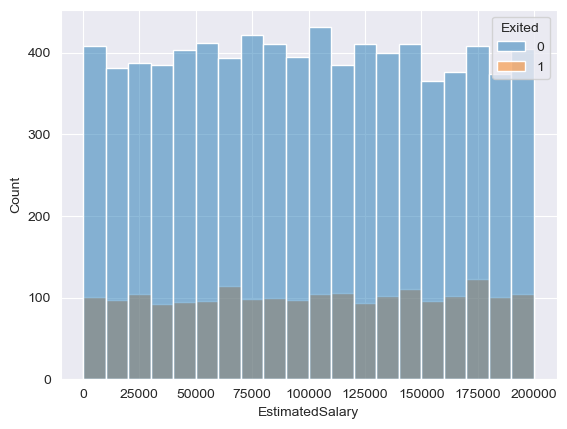

In [49]:
sns.histplot(x=df1['EstimatedSalary'], bins=20, kde=False ,data = df1 , hue='Exited')

<Axes: xlabel='CreditScore', ylabel='Count'>

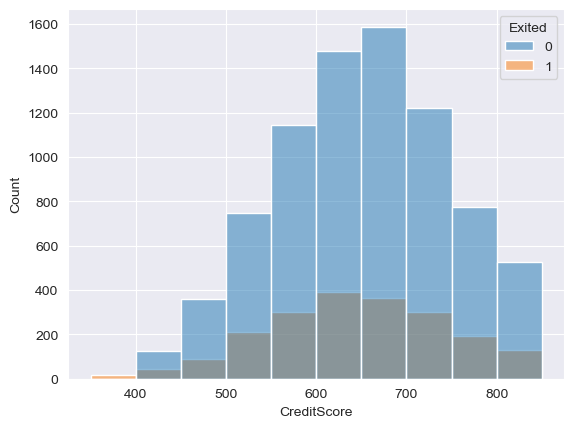

In [50]:
sns.histplot(x=df1['CreditScore'], bins=10, kde=False ,data = df1 , hue='Exited')

In [51]:
df1[df1['CreditScore'] < 400]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


<Axes: xlabel='Age', ylabel='Count'>

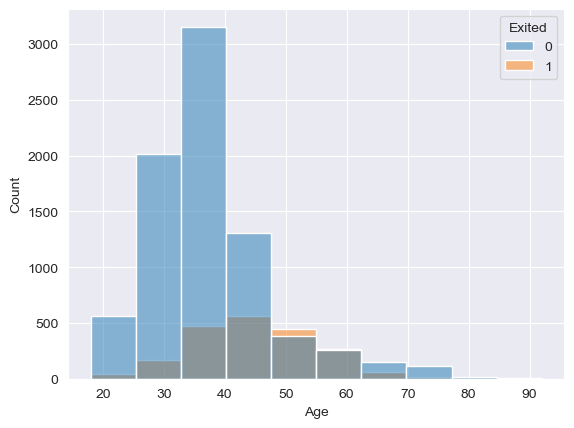

In [52]:
sns.histplot(x=df1['Age'], bins=10, kde=False ,data = df1 , hue='Exited')


<Axes: xlabel='Exited', ylabel='count'>

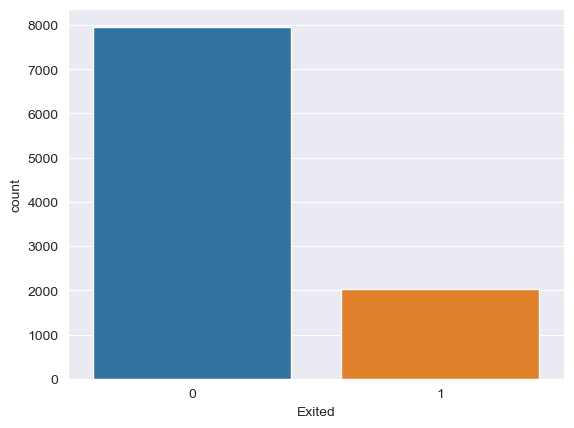

In [53]:
sns.countplot(x='Exited',data=df1)

<Axes: xlabel='Gender', ylabel='count'>

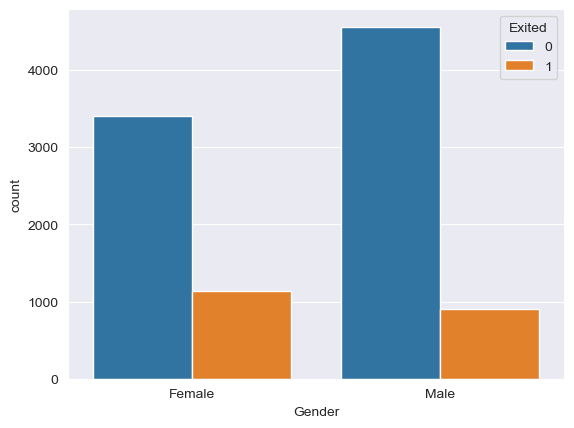

In [54]:
sns.countplot(x='Gender',data=df1,hue='Exited')

<Axes: xlabel='Tenure', ylabel='Count'>

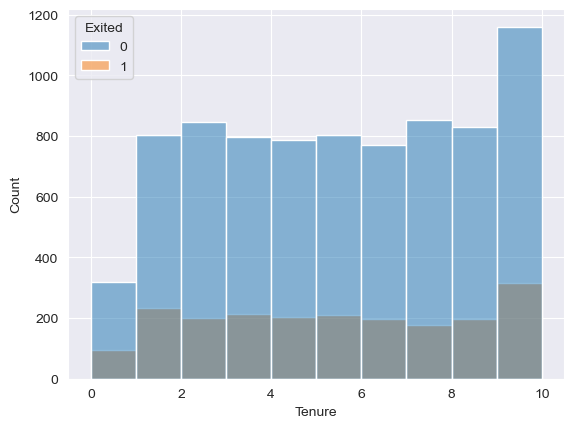

In [55]:
sns.histplot(x=df1['Tenure'], bins=10, kde=False ,data = df1 , hue='Exited')


C:\Users\fractal\AppData\Local\Temp\ipykernel_9724\3517710561.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df1.corr(),annot=True)


<Axes: >

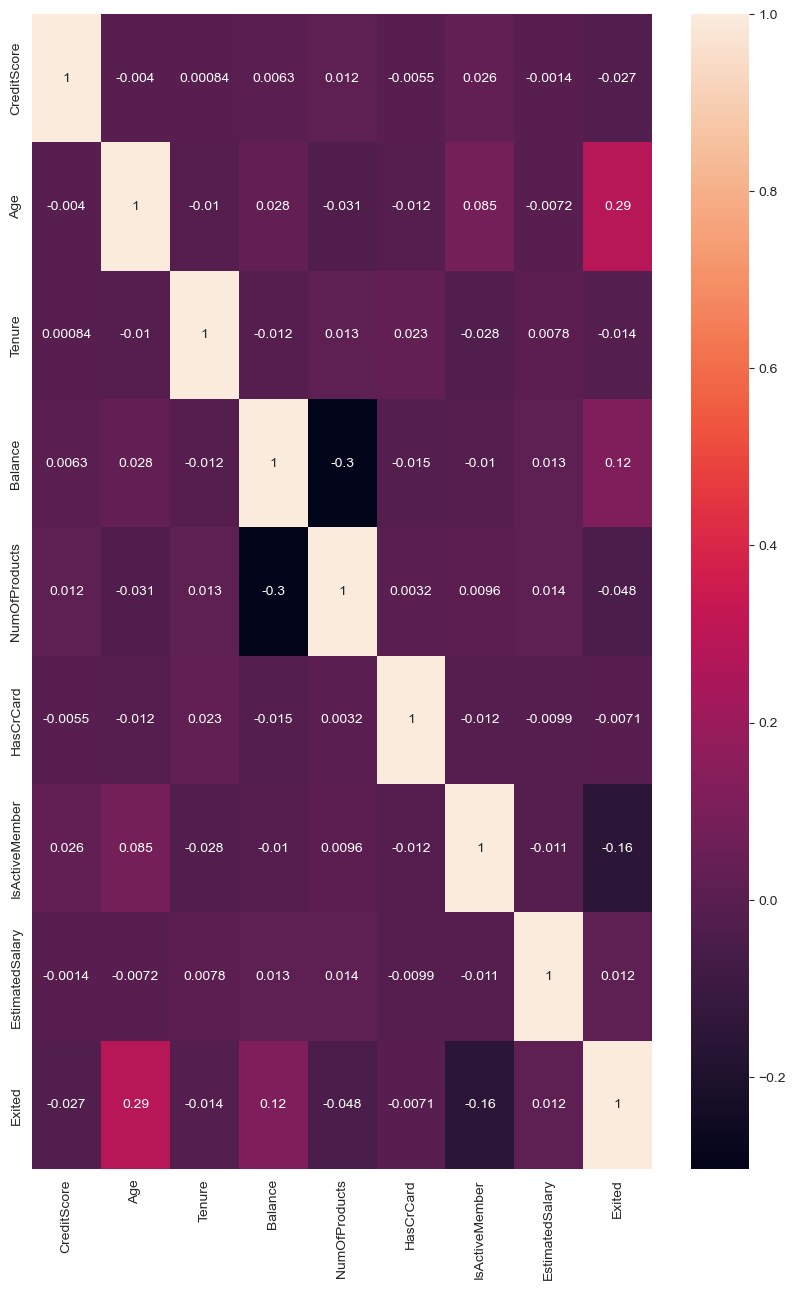

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
sns.heatmap( df1.corr(),annot=True)

<Axes: xlabel='Balance', ylabel='Count'>

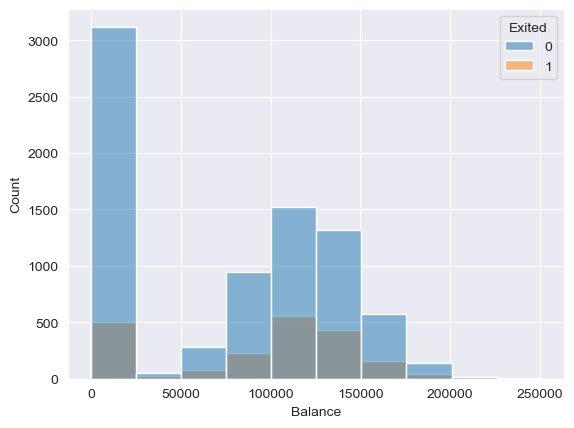

In [57]:

sns.histplot(x=df1['Balance'], bins=10, kde=False ,data = df1 , hue='Exited' )

<Axes: xlabel='NumOfProducts', ylabel='count'>

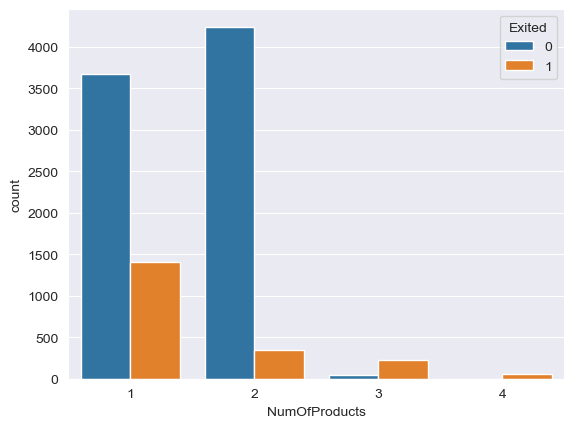

In [58]:
sns.countplot(x='NumOfProducts',data=df1,hue='Exited')


In [59]:
df2 =df1.drop_duplicates()

In [60]:
df2.head(200)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0
196,616,Spain,Female,32,6,0.00,2,1,1,43001.46,0
197,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0
198,501,France,Male,57,10,0.00,2,1,1,47847.19,0


In [61]:
df3 = df2.copy()

In [62]:
#encoding genre data
df3['Gender'] = df3['Gender'].apply(lambda x: 0 if x == "Female" else 1)

In [63]:
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df3.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [65]:
df4 = df3.copy()

In [66]:
#encoding Geography data
country_mapping = {
    "France": 0,
    "Germany": 1,
    "Spain": 2
}

map_country_to_numeric = lambda country: country_mapping.get(country)
df4['Geography'] = df4['Geography'].apply(map_country_to_numeric)


In [67]:
df4.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [68]:
X  = df4.drop('Exited' , axis = 1)
Y = df4['Exited']

In [69]:
#data scaling
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
X_scaled

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

<h1>Model builing and hyperparam tuning<h1>

In [71]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def hyper_param_tuning(x,y,scorer):
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [1, 5, 10]
            }
        },

        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 20, 50],
                'max_depth': [None, 10],
            }
        },

        'Gradient Boosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1],
            }
        },

        'SVM': {
            'model': SVC(),
            'params': {
                'C': [1, 10, 20],
            }
        },

        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
            }
        }
    }

    scores = []
   

    cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
    for algo , params in models.items():
        grid_cv = GridSearchCV(params['model'],params['params'] , cv=cv , return_train_score=False , scoring=scorer )
        grid_cv.fit(x,y)
        scores.append({
            'model_name': algo,
            'score': grid_cv.best_score_,
            'best_params': grid_cv.best_params_

        })


    scores_df = pd.DataFrame(scores,columns=['model_name','score','best_params'])
    return scores_df    

In [38]:
f1_scorer = make_scorer(f1_score)
hyper_param_tuning(X_scaled,Y,f1_scorer)

,model_name,score,best_params
0,Logistic Regression,0.288278,{'C': 10}
1,Random Forest,0.583846,"{'max_depth': None, 'n_estimators': 50}"
2,Gradient Boosting,0.598564,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,SVM,0.528213,{'C': 20}
4,K-Nearest Neighbors,0.434702,{'n_neighbors': 3}


In [72]:
#using smote to balance the dataset 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split

sm = SMOTE(random_state = 12 , sampling_strategy='auto')

X_train , X_test , Y_train, Y_test = train_test_split(X_scaled,Y , test_size=0.35)
X_sm , Y_sm = sm.fit_resample(X_train , Y_train)
unique , count = np.unique(Y_sm, return_counts=True)
smote_count = {k:v for(k,v) in zip(unique , count)}
smote_count


{0: 5155, 1: 5155}

In [74]:
scorerr = 'accuracy'
hyper_param_tuning(X_sm,Y_sm,scorerr)


,model_name,score,best_params
0,Logistic Regression,0.703201,{'C': 5}
1,Random Forest,0.892338,"{'max_depth': None, 'n_estimators': 50}"
2,Gradient Boosting,0.891465,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,SVM,0.818720,{'C': 20}
4,K-Nearest Neighbors,0.847721,{'n_neighbors': 3}


<h1>Model Testing<h1>

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=200)
model.fit(X_sm , Y_sm)
model.score(X_test,Y_test)

0.8505714285714285